In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import time
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [4]:
## Load the training data
df1=pd.read_csv('train.csv', sep=',',header=None)
df2=pd.read_csv('test.csv', sep=',',header=None)
train_data = df1.values
train_data = np.delete(train_data, 0, axis=0) # deleting column names
train_labels = train_data[:,0]
train_data = np.delete(train_data, 0, axis=1) # deleting the label column
test_data = df2.values


/home/administrator/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,

In [6]:
#Printing out the dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
train_labels = list(map(int, train_labels))
test_data = np.delete(test_data, 0, axis=0) # deleting column names
np.shape(test_data)


Training dataset dimensions:  (42000, 784)
Number of training labels:  42000
Testing dataset dimensions:  (28001, 784)


(28000, 784)

In [7]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels[1:], return_counts = True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

Training set distribution:
{0: 4132, 1: 4683, 2: 4177, 3: 4351, 4: 4072, 5: 3795, 6: 4137, 7: 4401, 8: 4063, 9: 4188}


**Visualizing the Train Data:**

Each data point is stored as 784 dimensional vector. To visualize a data point, we first reshape it into a 28x28 image.

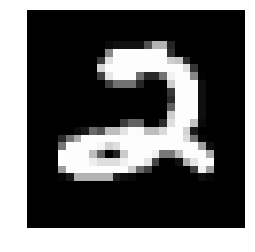

In [8]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis("off")
    x = np.asarray(list(map(int, x)))
    plt.imshow(x.reshape((28,28)), cmap = plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if (dataset=='train'):
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        #label = test_labels[index]
    #print("Label "+ str(label))
    return

## View the first data point in the training set
vis_image(0, "test")

**Squared Euclidean distance**

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

In [9]:
##computes squared euclidean distance between two vectors
def squared_dist(x, y):
    x = np.asarray(list(map(float, x)))
    y = np.asarray(list(map(float, y)))
    return np.sum(np.square(x-y))

## Compute distance between a six and a two in our training set
print ("Distance from 6 to 2: ", squared_dist(train_data[266,],train_data[22,]))

Distance from 6 to 2:  9334629.0


**Computing nearest neighbours**

A sample case:
NN classification:  2
The test image: 


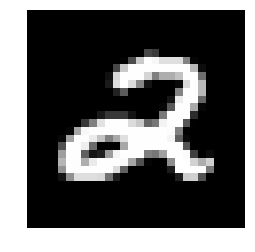

The corresponding nearest neighbour image: 


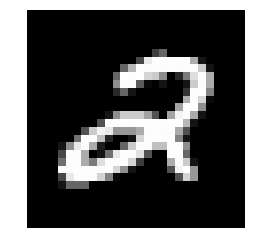

In [41]:
## Takes a vector x and returns the index of its nearest neighbour in train_data
def find_NN(x):
    #compute distances from x to every row in train_data
    distances = [squared_dist(x, train_data[i,]) for i in range(len(train_labels))]
    #Get the index of the smallest distance
    return np.argmin(distances)

## Takes a vector x and returns the class of its nearest neighbour in train_data
def NN_classifier(x):
    #Get the index of the nearest neighbour
    index = find_NN(x)
    # Return its class
    return train_labels[index]

## A sample case
print ("A sample case:")
print ("NN classification: ", NN_classifier(test_data[27999,]))
print ("The test image: ")
vis_image(27999, "test")
print ("The corresponding nearest neighbour image: ")
vis_image(find_NN(test_data[27999,]), "train")


In [17]:
#l = []
#imid = []
#for i in range(28000):
    #l.append(NN_classifier(test_data[i,]))
    #imid.append(i)
    
#l = [NN_classifier(test_data[i,]) for i in range(20)]

from sklearn.neighbors import BallTree

# Build nearest neighbour structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbours = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
#ball_tree_predictions = train_labels[test_neighbours]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)


Time to classify test set (seconds):  849.5557971000671


In [22]:
ball_tree_predictions = []
for i in range(28000):
    ball_tree_predictions.append(train_labels[test_neighbours[i]])

In [45]:
imid = [i for i in range(1,28001)]
name = [('ImageId', 'Label')]

In [46]:
dat = list(zip(imid, ball_tree_predictions))
dat = name + dat

In [50]:
import csv

with open('sub.csv', "w") as f:
    writer = csv.writer(f)
    for row in dat:
        writer.writerow(row)